In [1]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2023-11-24 00:30:22--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2023-11-24 00:30:22 (43.7 MB/s) - ‘airline-passengers.csv’ saved [2180/2180]



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


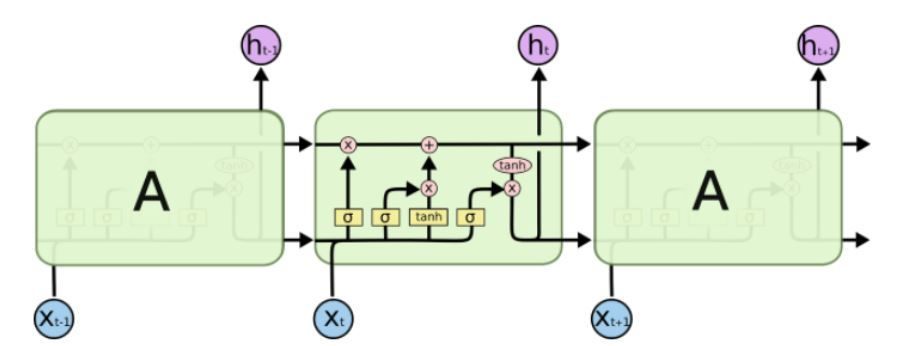

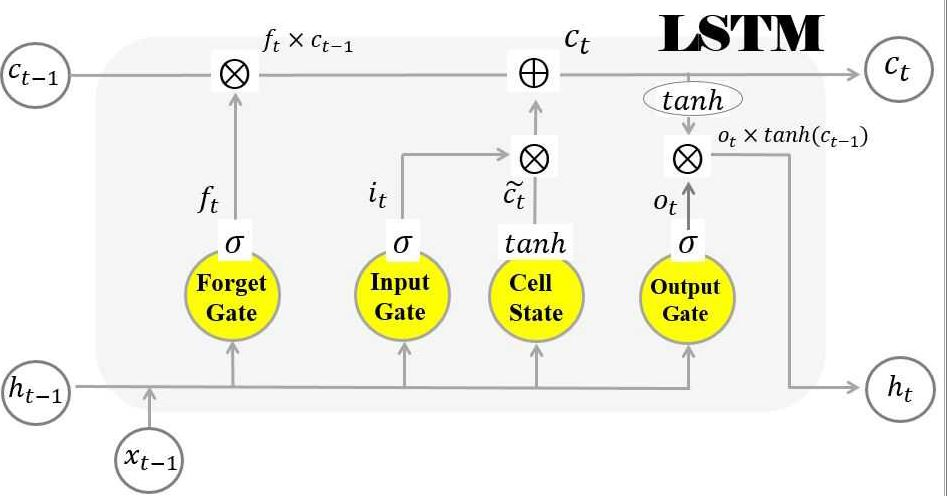

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


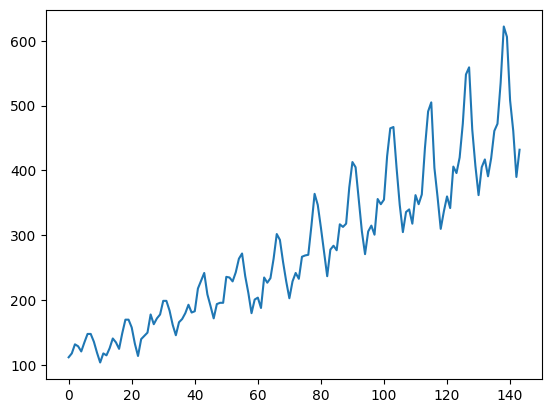

In [3]:
training_set = pd.read_csv('airline-passengers.csv')
print(training_set.head())
dt = training_set.iloc[:,1:2].values
plt.plot(dt)
plt.show()

In [4]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

In [5]:
sc = MinMaxScaler()
dt = sc.fit_transform(dt)
seq_length = 4
x, y = sliding_windows(dt, seq_length)
print(x,y)
print(x.shape)
print(y.shape)

train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

[[[0.01544402]
  [0.02702703]
  [0.05405405]
  [0.04826255]]

 [[0.02702703]
  [0.05405405]
  [0.04826255]
  [0.03281853]]

 [[0.05405405]
  [0.04826255]
  [0.03281853]
  [0.05984556]]

 [[0.04826255]
  [0.03281853]
  [0.05984556]
  [0.08494208]]

 [[0.03281853]
  [0.05984556]
  [0.08494208]
  [0.08494208]]

 [[0.05984556]
  [0.08494208]
  [0.08494208]
  [0.06177606]]

 [[0.08494208]
  [0.08494208]
  [0.06177606]
  [0.02895753]]

 [[0.08494208]
  [0.06177606]
  [0.02895753]
  [0.        ]]

 [[0.06177606]
  [0.02895753]
  [0.        ]
  [0.02702703]]

 [[0.02895753]
  [0.        ]
  [0.02702703]
  [0.02123552]]

 [[0.        ]
  [0.02702703]
  [0.02123552]
  [0.04247104]]

 [[0.02702703]
  [0.02123552]
  [0.04247104]
  [0.07142857]]

 [[0.02123552]
  [0.04247104]
  [0.07142857]
  [0.05984556]]

 [[0.04247104]
  [0.07142857]
  [0.05984556]
  [0.04054054]]

 [[0.07142857]
  [0.05984556]
  [0.04054054]
  [0.08687259]]

 [[0.05984556]
  [0.04054054]
  [0.08687259]
  [0.12741313]]

 [[0.040

In [6]:
class LSTM(nn.Module):

    def __init__(self, output, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()

        self.output = output
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)

        self.fc = nn.Linear(hidden_size, output)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))

        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))

        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))

        h_out = h_out.view(-1, self.hidden_size)

        out = self.fc(h_out)

        return out

In [7]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1

output = 1

lstm = LSTM(output, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()

    # obtain the loss function
    loss = criterion(outputs, trainY)

    loss.backward()

    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.53510
Epoch: 100, loss: 0.01925
Epoch: 200, loss: 0.01879
Epoch: 300, loss: 0.01849
Epoch: 400, loss: 0.01782
Epoch: 500, loss: 0.01097
Epoch: 600, loss: 0.00307
Epoch: 700, loss: 0.00235
Epoch: 800, loss: 0.00190
Epoch: 900, loss: 0.00174
Epoch: 1000, loss: 0.00172
Epoch: 1100, loss: 0.00172
Epoch: 1200, loss: 0.00171
Epoch: 1300, loss: 0.00170
Epoch: 1400, loss: 0.00170
Epoch: 1500, loss: 0.00169
Epoch: 1600, loss: 0.00169
Epoch: 1700, loss: 0.00168
Epoch: 1800, loss: 0.00168
Epoch: 1900, loss: 0.00168


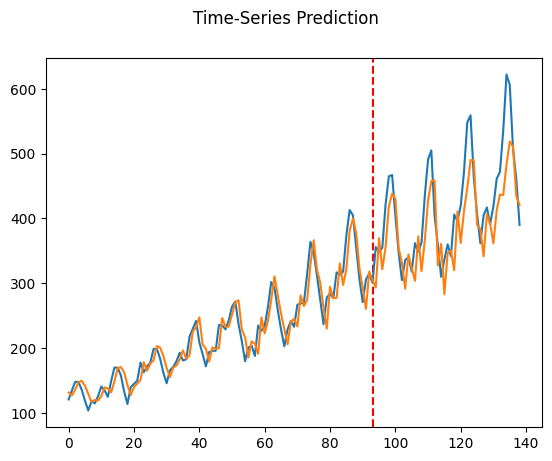

In [8]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()

In [10]:
data_path = '/content/drive/My Drive/Colab Notebooks'
bdi = pd.read_csv(data_path+'/Data/bdi.csv')
bdi = bdi.iloc[3000:,:]
bdi.head()

,date,bdi
3000,2011-Oct-31,1965
3001,2011-Nov-01,1912
3002,2011-Nov-02,1859
3003,2011-Nov-03,1817
3004,2011-Nov-04,1784


In [11]:
dt = bdi.iloc[:,1:2].values
print(dt.shape)
dt = bdi.iloc[:,1].values
print(dt.shape)


(1567, 1)
(1567,)


In [13]:
sc = MinMaxScaler()
dt = sc.fit_transform(dt.reshape(-1,1))

seq_length = 90
x, y = sliding_windows(dt, seq_length)

train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

In [14]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1
output = 1

lstm = LSTM(output, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()

    # obtain the loss function
    loss = criterion(outputs, trainY)

    loss.backward()

    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.05943
Epoch: 100, loss: 0.00154
Epoch: 200, loss: 0.00072
Epoch: 300, loss: 0.00048
Epoch: 400, loss: 0.00035
Epoch: 500, loss: 0.00026
Epoch: 600, loss: 0.00022
Epoch: 700, loss: 0.00020
Epoch: 800, loss: 0.00018
Epoch: 900, loss: 0.00017
Epoch: 1000, loss: 0.00016
Epoch: 1100, loss: 0.00015
Epoch: 1200, loss: 0.00014
Epoch: 1300, loss: 0.00013
Epoch: 1400, loss: 0.00013
Epoch: 1500, loss: 0.00012
Epoch: 1600, loss: 0.00012
Epoch: 1700, loss: 0.00011
Epoch: 1800, loss: 0.00011
Epoch: 1900, loss: 0.00011


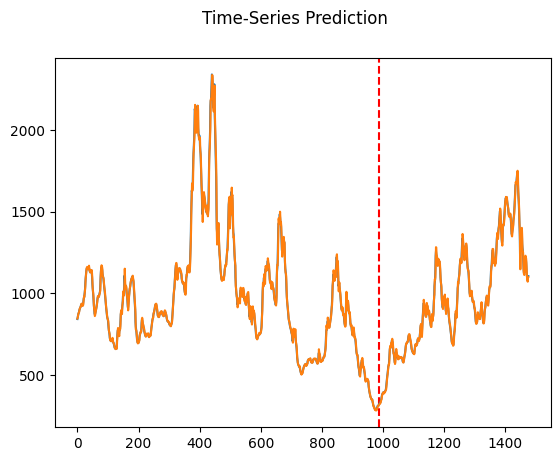

In [15]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()